In [52]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import inception_v3
from keras.layers import Input,Flatten,Conv2D,Dense,MaxPooling2D,Dropout,BatchNormalization
from keras.models import load_model,Sequential,Model,Input
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

In [5]:
train_generator=ImageDataGenerator(rescale=1/255,horizontal_flip=True,vertical_flip=True,rotation_range=45,zoom_range=0.25)
val_generator=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [6]:
os.chdir(r'C:\Users\HP\data\Brain_tumor_classification')

In [11]:
def load_training_data():
    training_data=train_generator.flow_from_directory('Training',color_mode='rgb',class_mode='categorical',target_size=(200,200),subset='training')
    validation_data=val_generator.flow_from_directory('Training',color_mode='rgb',class_mode='categorical',target_size=(200,200),subset='validation')
    return (training_data,validation_data)
 
def load_testing_data():
    return train_generator.flow_from_directory("Testing",color_mode="rgb",target_size=(200,200))

In [12]:
(train_data,val_data)=load_training_data()
test_data=load_testing_data()

Found 2870 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


<AxesSubplot:>

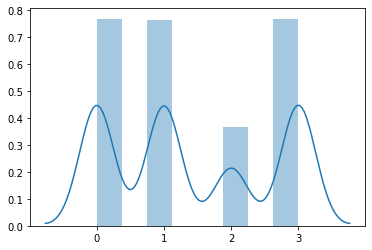

In [13]:
#checking the distribution of images (training samples) in our categories
sns.distplot(pd.DataFrame(train_data.labels))

In [ ]:
model=keras.applications.efficientnet.EfficientNetB7(include_top=False,weights='imagenet',input_shape=(200,200,3))
 

258080768/258076736 [==============================] - 1s 0us/step


In [16]:
name=input("enter name of directory to store your model and weights")
modelcallback=ModelCheckpoint(filepath="model/{}.cpkt".format(name),save_best_only=True,save_weights_only=False,verbose=True)

enter name of directory to store your model and weightshunger


In [62]:
model=Sequential()

 
          
model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())          
          
model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization()) 
          
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))

#adding regularization to the model

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 196, 196, 128)     9728      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 98, 98, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 98, 128)       512       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 94, 94, 64)        204864    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 43, 43, 32)       

In [63]:
loss=keras.losses.CategoricalCrossentropy() 
model.compile(loss=loss,optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,epochs=20,callbacks=[modelcallback],validation_data=val_data)

Epoch 1/20
 2/90 [..............................] - ETA: 8:12:31 - loss: 4.1204 - accuracy: 0.2969 

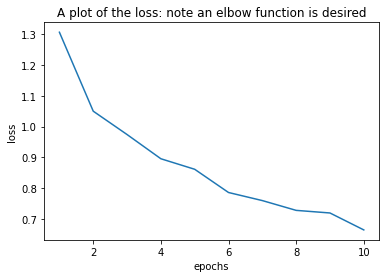

In [24]:
#plotting the performance of the model
 
loss=history.history['loss']
epochs=range(1,11)
plt.title('A plot of the loss: note an elbow function is desired')
plt.plot(epochs,loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

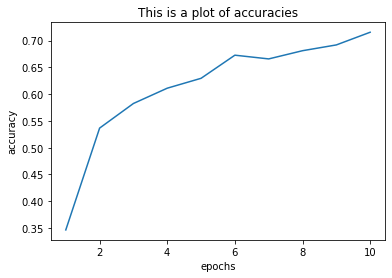

In [25]:
accuracy=history.history["accuracy"]
plt.title("This is a plot of accuracies")
plt.plot(epochs,accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [40]:
prediction_data=model.predict(test_data)

In [42]:
def get_pred(data):
    
  
    my_data=[]

    for i in data:
        
        prediction=np.where(i==np.amax(i))

        my_data.append(prediction[0][0])

  
    return my_data


In [43]:
y_pred=get_pred(prediction_data)

              precision    recall  f1-score   support

           0       0.21      0.05      0.08       100
           1       0.29      0.24      0.27       115
           2       0.26      0.57      0.35       105
           3       0.28      0.15      0.19        74

    accuracy                           0.26       394
   macro avg       0.26      0.25      0.22       394
weighted avg       0.26      0.26      0.23       394



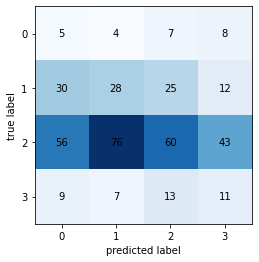

In [44]:
# plotting a confusion matrix for our data
 
labels=["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"] 
conf_mat=confusion_matrix(y_pred,test_data.labels)

plot_confusion_matrix(conf_mat)
report=classification_report(test_data.labels,y_pred)
print(report) 

In [41]:
 len(prediction_data)

394